# Projet IA.
## Livrable code


|Auteur|Modification|
|---|---|
|Majorel Pierre|16/03/13|
|Alami Ouali Othmane|15/03/13|
|Lopez Daniel|16/03/13|

### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail.

In [5]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn

In [6]:
# import
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = r"." #changez ce chemin en fonction de votre dossier
CHAPTER_ID = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images_Projet", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import des données

Il convient d'automatiser l'import des données. On va implémenter une fonction qui se charge de :
* télécharger l'archive
* extraire les fichiers

On peut maintenant importer les données :

### Chargement des données en mémoire

#### Nous commençons par lire nos données contenues dans notre fichier csv 

In [7]:
import pandas as pd
import seaborn as sns 

def load_donnees_data():
    csv_path = "Donnees_triees.csv"
    return pd.read_csv(csv_path,sep=";", encoding = "ISO-8859-1")

donnees = load_donnees_data()

#### Nous regardons ensuite si certaines données sont manquantes afin de pouvoir les remplacer par la suite

In [8]:
def count_na_by_column(df):
    na_count = df.isna().sum()
    return na_count

# Compter le nombre de valeurs manquantes par colonne
na_count = count_na_by_column(donnees)
# Afficher le nombre de valeurs manquantes par colonne
print(na_count)

EmployeeID                    0
Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
Over18                        0
JobLevel                      0
JobRole                       0
MonthlyIncome                 0
NumCompaniesWorked           19
PercentSalaryHike             0
StockOptionLevel              0
TotalWorkingYears             9
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
EnvironmentSatisfaction      25
WorkLifeBalance              38
JobInvolvement                0
HeureMoyJour                  0
Nombre de jour travailles     0
HeureMoyJour2                 0
dtype: int64


#### Il y a des données manquantes, nous allons donc remplir ces valeurs manquantes par la médiane des valeurs de la colonne qui leur est associée

In [9]:
donnees = donnees.fillna(donnees.median())

C:\Users\danie\AppData\Local\Temp\ipykernel_14588\2846101230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  donnees = donnees.fillna(donnees.median())


#### Ici, nous vérifions qu'il n'y a plus de valeurs manquantes

In [10]:
# Compter le nombre de valeurs manquantes par colonne
na_count = count_na_by_column(donnees)

# Afficher le nombre de valeurs manquantes par colonne
print(na_count)

EmployeeID                   0
Age                          0
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
Over18                       0
JobLevel                     0
JobRole                      0
MonthlyIncome                0
NumCompaniesWorked           0
PercentSalaryHike            0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
EnvironmentSatisfaction      0
WorkLifeBalance              0
JobInvolvement               0
HeureMoyJour                 0
Nombre de jour travailles    0
HeureMoyJour2                0
dtype: int64


#### Nous affichons maintenant nos données pour vérifier qu'elles sont lues correctement

In [11]:
donnees.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Over18,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,WorkLifeBalance,JobInvolvement,HeureMoyJour,Nombre de jour travailles,HeureMoyJour2
0,1,51,0,2,Sales,6,2,1,1,Healthcare Representative,...,6,1,0,0,3.0,2.0,3,06:33:16,232,6.554444
1,2,31,1,3,Research & Development,10,1,1,1,Research Scientist,...,3,5,1,4,3.0,4.0,2,06:58:47,236,6.979722
2,3,32,0,3,Research & Development,17,4,1,4,Sales Executive,...,2,5,0,3,2.0,1.0,3,06:30:10,242,6.502778
3,4,38,0,1,Research & Development,2,5,1,3,Human Resources,...,5,8,7,5,4.0,3.0,2,06:28:37,235,6.476944
4,5,32,0,2,Research & Development,10,1,1,1,Sales Executive,...,2,6,0,4,4.0,3.0,3,07:30:55,245,7.515278


In [12]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployeeID                 4410 non-null   int64  
 1   Age                        4410 non-null   int64  
 2   Attrition                  4410 non-null   int64  
 3   BusinessTravel             4410 non-null   int64  
 4   Department                 4410 non-null   object 
 5   DistanceFromHome           4410 non-null   int64  
 6   Education                  4410 non-null   int64  
 7   Over18                     4410 non-null   int64  
 8   JobLevel                   4410 non-null   int64  
 9   JobRole                    4410 non-null   object 
 10  MonthlyIncome              4410 non-null   int64  
 11  NumCompaniesWorked         4410 non-null   float64
 12  PercentSalaryHike          4410 non-null   int64  
 13  StockOptionLevel           4410 non-null   int64

### Visualisation des données

Les différentes étapes ci-dessous vont nous permettre de déterminer quelles sont __les variables explicatives__.

#### Nous transformons les données non ordinales à l'aide du 1hotencoder

In [13]:
donnees_cat = donnees[["Department","JobRole"]]
donnees_cat.head(10)

,Department,JobRole
0,Sales,Healthcare Representative
1,Research & Development,Research Scientist
2,Research & Development,Sales Executive
3,Research & Development,Human Resources
4,Research & Development,Sales Executive
5,Research & Development,Research Director
6,Research & Development,Sales Executive
7,Research & Development,Sales Executive
8,Research & Development,Laboratory Technician
9,Research & Development,Laboratory Technician


In [14]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
donnees_cat_1hot = cat_encoder.fit_transform(donnees_cat)
donnees_cat_1hot # array creux par défaut

<4410x12 sparse matrix of type '<class 'numpy.float64'>'
	with 8820 stored elements in Compressed Sparse Row format>

#### Nous affichons un histogramme par attribut numérique
Cela nous permet de vérifier qu'il n'y a pas de valeurs aberrantes.

array([[<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'cen

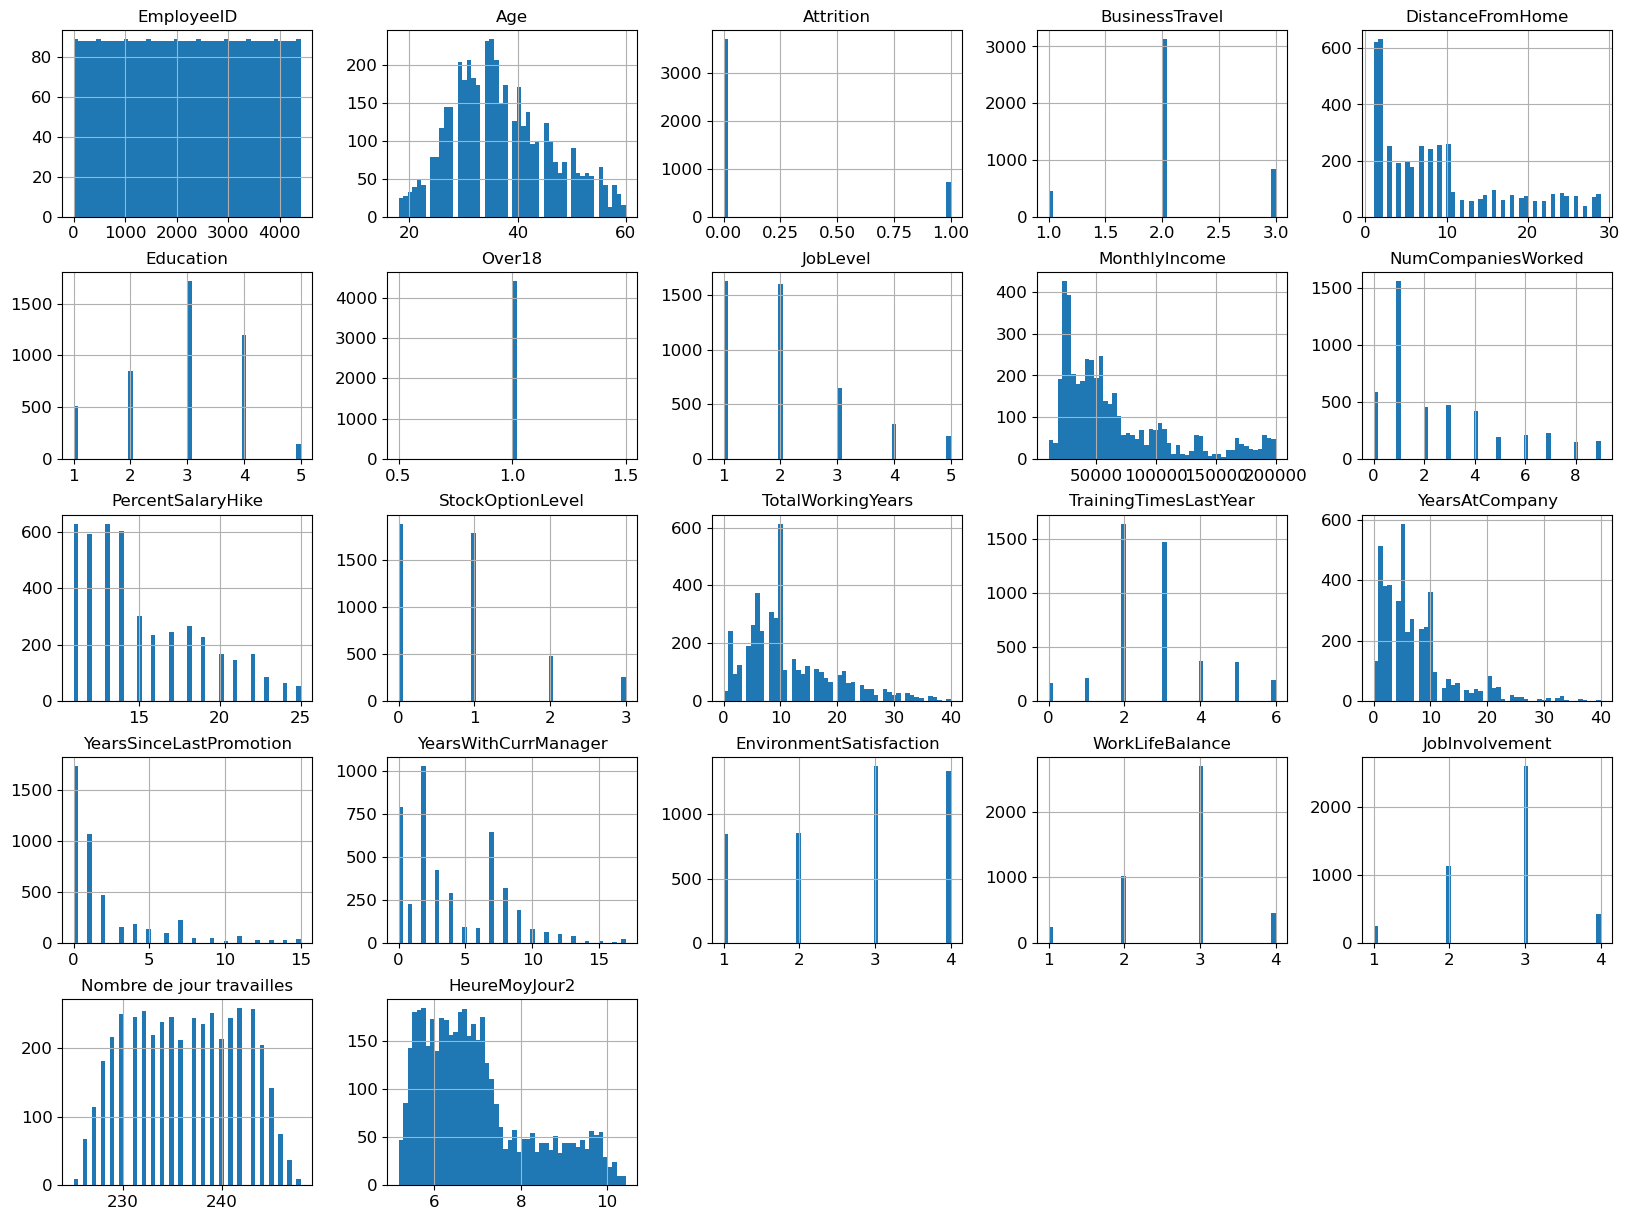

In [15]:
donnees.hist(bins=50, figsize=(20,15))

Nous n'avons pas de valeurs aberrantes.

#### Nous affichons des boîtes à moustaches
Si certaines boites à moustaches sont identiques, alors la variable utilisée pour la créer n'est pas explicative

<AxesSubplot:title={'center':'Nombre de jour travailles'}, xlabel='Attrition'>

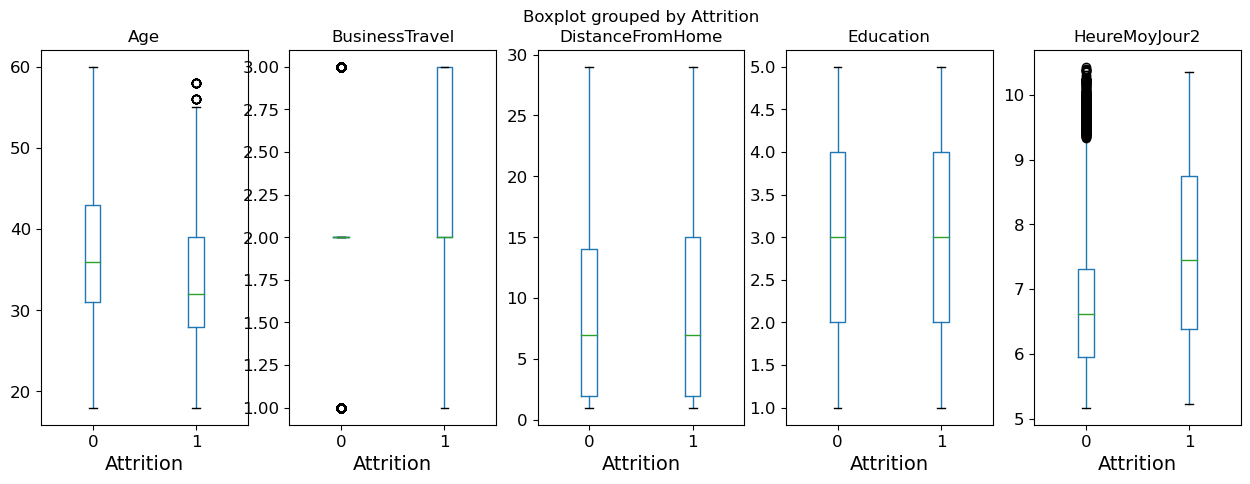

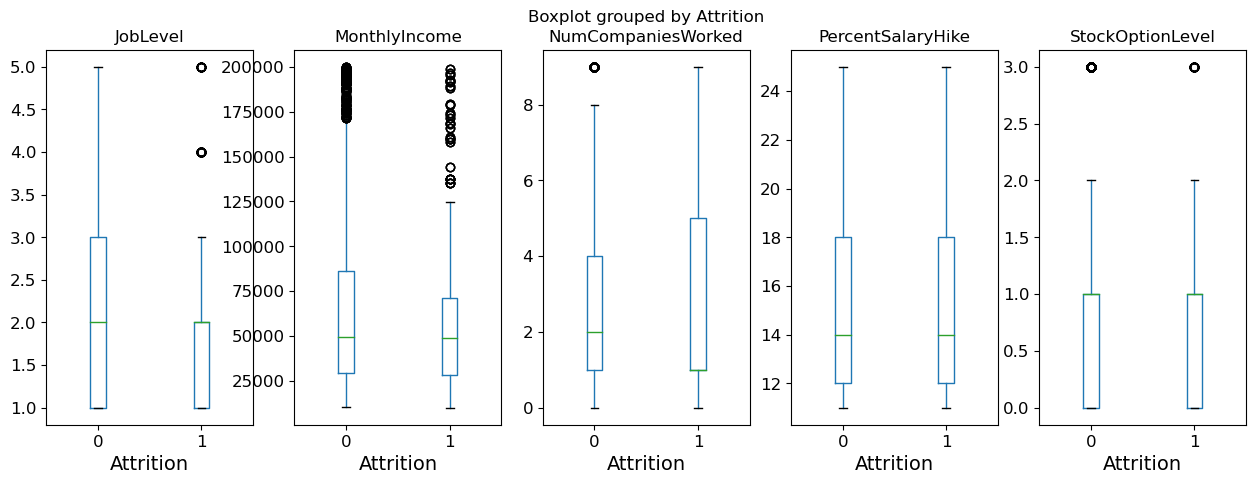

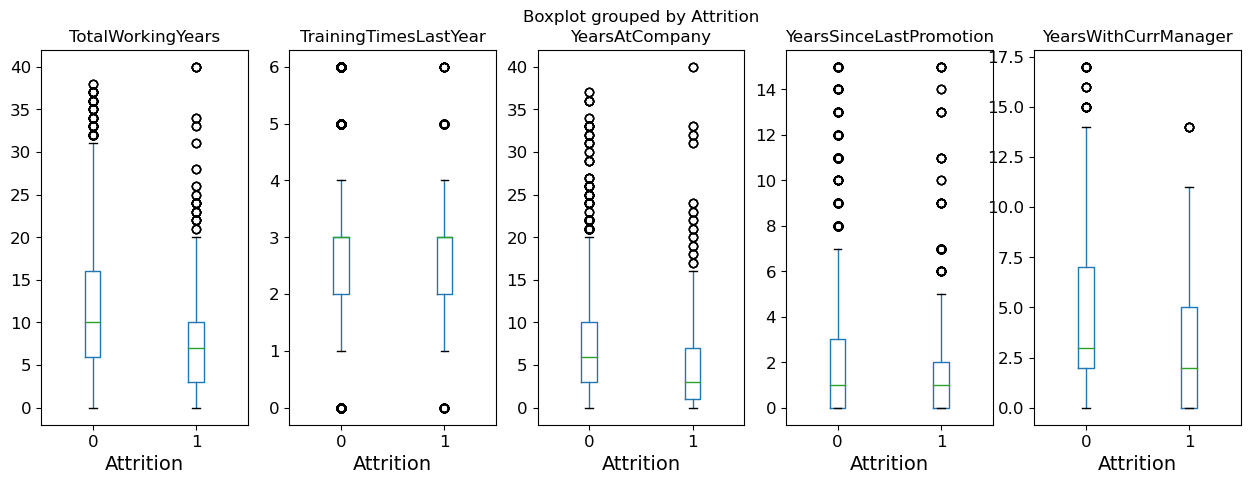

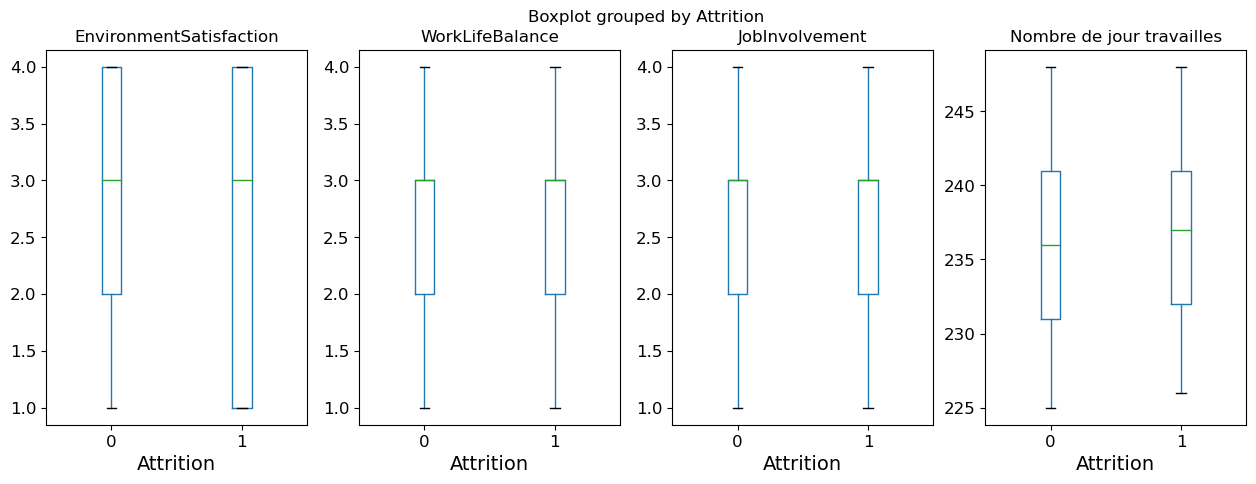

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['Age'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['BusinessTravel'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['DistanceFromHome'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Education'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['HeureMoyJour2'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['JobLevel'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['MonthlyIncome'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['NumCompaniesWorked'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['PercentSalaryHike'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['StockOptionLevel'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['TotalWorkingYears'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['TrainingTimesLastYear'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['YearsAtCompany'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['YearsSinceLastPromotion'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['YearsWithCurrManager'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['EnvironmentSatisfaction'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['WorkLifeBalance'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['JobInvolvement'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Nombre de jour travailles'], grid = False, ax=ax4)

On peut d'ores et deja voir que les variables suivantes ne sont pas explicatives et donc ne nécessitent pas d'être gardées :
* Education
* PercentsalaryHike
* StockOptionLevel
* TrainingTimesLastYear
* WorkLifeBalanace
* JobInvolvment

#### Nous effectuons ensuite une matrice de corrélation

<AxesSubplot:>

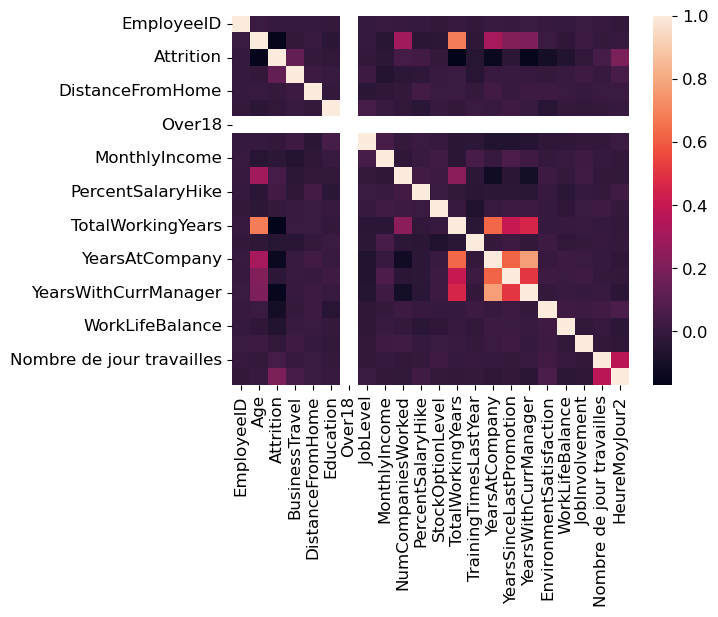

In [17]:
donnees_heatmap = donnees[['Attrition','Age','MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','Education','NumCompaniesWorked']]
corr = donnees.corr()
sns.heatmap(corr)

#### Nous créons désormais des histgrammes en bâtons 
Si les proportions d'attrition reste les mêmes pour chaque tranches de valeur de chaque histogramme, alors on peut émettre l'hypothèse que la variable n'est pas explicative.

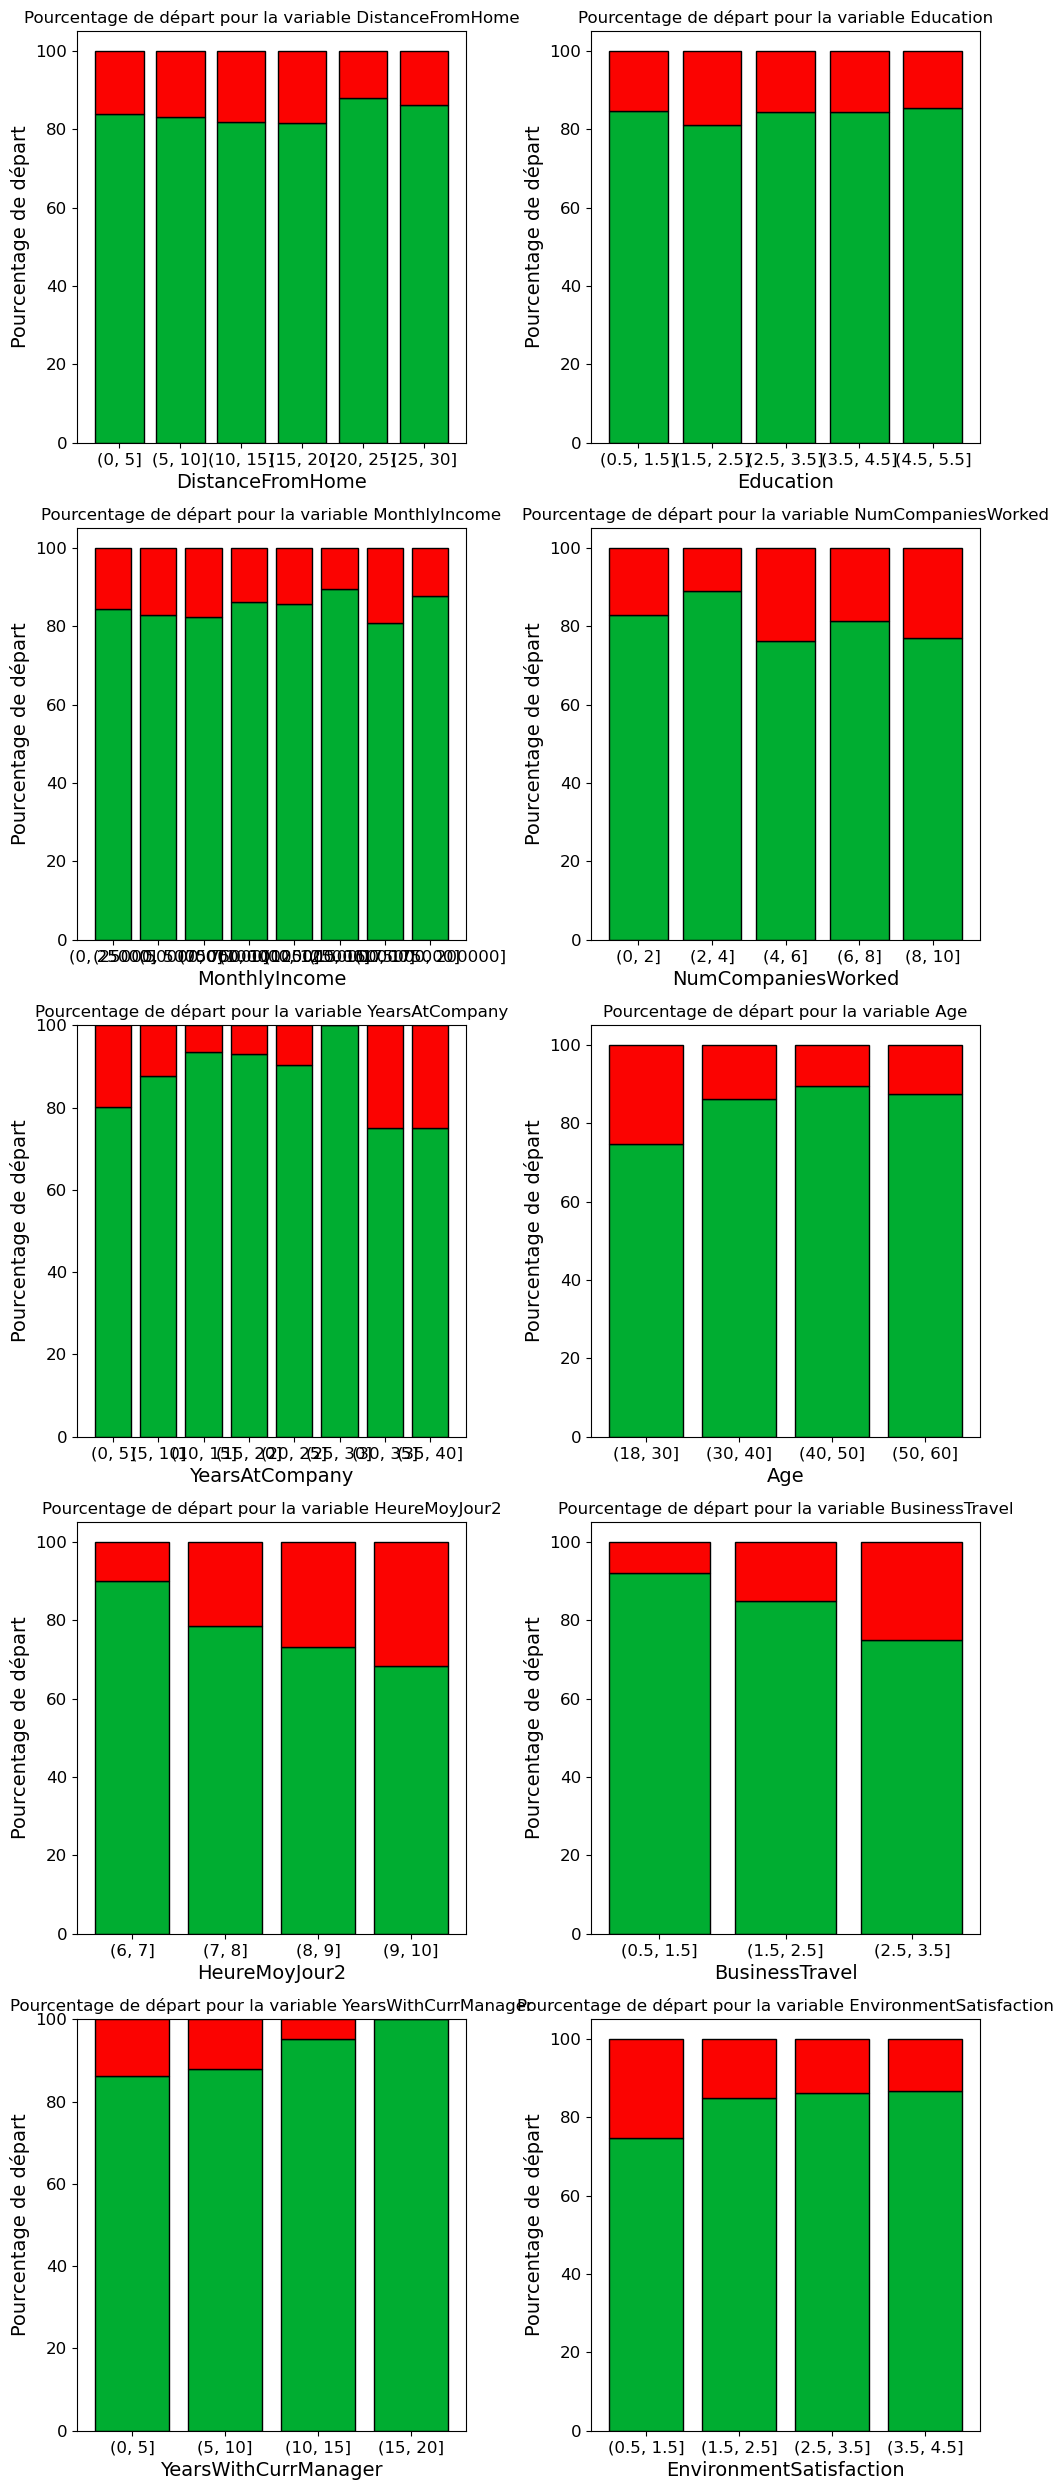

In [18]:
# Liste des variables pour lesquelles on veut afficher les pourcentages de départ
variables = ['DistanceFromHome','Education', 'MonthlyIncome','NumCompaniesWorked', 'YearsAtCompany','Age','HeureMoyJour2','BusinessTravel','YearsWithCurrManager','EnvironmentSatisfaction']

# Définition des tranches pour chaque variable
bins = {
    'DistanceFromHome': [0, 5, 10, 15, 20, 25, 30],
    'Education': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    'MonthlyIncome': [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000],
    'NumCompaniesWorked': [0, 2, 4, 6, 8, 10],
    'YearsAtCompany': [0, 5, 10, 15, 20, 25, 30, 35, 40],
    'Age': [18, 30, 40, 50, 60],
    'HeureMoyJour2' :[6, 7, 8, 9, 10],
    'BusinessTravel':[0.5, 1.5, 2.5, 3.5],
    'YearsWithCurrManager':[0, 5, 10, 15, 20],
    'EnvironmentSatisfaction':[0.5, 1.5, 2.5, 3.5, 4.5]
}
# Calcul du nombre total de variables
n_variables = len(variables)

# Calcul du nombre de lignes et de colonnes pour l'affichage des graphiques
n_cols = min(n_variables, 2)
n_rows = int(np.ceil(n_variables / n_cols))

# Création des graphiques
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Affichage des graphiques pour chaque variable
for i, var in enumerate(variables):
    # Calcul des indices de ligne et de colonne pour le graphique courant
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Sélection des données pour la variable en cours
    donnees_var = donnees[['Attrition', var]]
    
    # Calcul du nombre d'employés pour chaque tranche de la variable et chaque catégorie d'attrition
    grouped_data = donnees_var.groupby([pd.cut(donnees_var[var], bins[var]), 'Attrition'])[var].count().unstack()
    
    # Conversion des nombres en pourcentages
    attrition_rates = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # Affichage de l'histogramme empilé correspondant à la variable en cours
    axs[row_idx, col_idx].bar(attrition_rates.index.astype(str), attrition_rates[0], color='#00AD31', edgecolor='black')
    axs[row_idx, col_idx].bar(attrition_rates.index.astype(str), attrition_rates[1], bottom=attrition_rates[0], color='#FB0301', edgecolor='black')
    
    # Ajout de titres et d'étiquettes
    axs[row_idx, col_idx].set_xlabel(var)
    axs[row_idx, col_idx].set_ylabel('Pourcentage de départ')
    axs[row_idx, col_idx].set_title('Pourcentage de départ pour la variable {}'.format(var))
    
# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

On peut donc considérer que les variables suivantes ne sont pas explicatives :
* DistanceFromHome

#### Nous créons une matrice de corrélation

Elle va nous permettre permet de visualiser les relations entre variables.

In [19]:
donnees.corr()

,EmployeeID,Age,Attrition,BusinessTravel,DistanceFromHome,Education,Over18,JobLevel,MonthlyIncome,NumCompaniesWorked,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,WorkLifeBalance,JobInvolvement,Nombre de jour travailles,HeureMoyJour2
EmployeeID,1.000000,0.008649,-0.004729,-0.003737,-0.001097,-0.009680,NaN,-0.003303,0.007338,-0.000789,...,-0.000956,-0.010191,0.004086,0.000256,0.008579,0.000455,-0.002164,0.008591,0.001291,-0.010238
Age,0.008649,1.000000,-0.159205,-0.011807,0.006963,-0.035706,NaN,-0.002884,-0.044314,0.298869,...,0.680340,-0.027308,0.311309,0.216513,0.202089,0.009699,-0.020524,0.018196,-0.007020,-0.000376
Attrition,-0.004729,-0.159205,1.000000,0.127006,-0.009730,-0.015111,NaN,-0.010290,-0.031176,0.042064,...,-0.170162,-0.049431,-0.134392,-0.033019,-0.156199,-0.101625,-0.062975,-0.015588,0.043517,0.198890
BusinessTravel,-0.003737,-0.011807,0.127006,1.000000,0.014130,0.007567,NaN,0.013727,-0.055905,-0.030698,...,0.008298,-0.043173,0.005212,0.005222,-0.000229,-0.009892,0.004914,0.025705,0.002859,0.049255
DistanceFromHome,-0.001097,0.006963,-0.009730,0.014130,1.000000,-0.008638,NaN,-0.037329,-0.021607,-0.013514,...,0.009314,-0.009001,0.031684,0.002290,0.021584,0.020113,0.008305,-0.001837,0.009141,0.009927
Education,-0.009680,-0.035706,-0.015111,0.007567,-0.008638,1.000000,NaN,0.045746,0.006410,-0.016195,...,-0.010813,0.010472,0.006080,0.022490,0.005358,-0.045636,-0.005610,-0.018279,-0.006927,0.001406
Over18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,-0.003303,-0.002884,-0.010290,0.013727,-0.037329,0.045746,NaN,1.000000,0.047316,-0.010116,...,-0.036779,-0.032500,-0.064219,-0.060811,-0.055251,-0.024540,-0.027763,-0.012630,-0.010941,0.011068
MonthlyIncome,0.007338,-0.044314,-0.031176,-0.055905,-0.021607,0.006410,NaN,0.047316,1.000000,-0.020515,...,-0.033758,0.050112,0.000995,0.065219,0.024304,-0.005747,0.003705,0.023346,-0.004751,-0.012428
NumCompaniesWorked,-0.000789,0.298869,0.042064,-0.030698,-0.013514,-0.016195,NaN,-0.010116,-0.020515,1.000000,...,0.238273,-0.032225,-0.117490,-0.036326,-0.109207,0.013060,-0.008844,0.027994,-0.011227,-0.015901


Rendons la un peu plus visuelle :

Saving figure scatter_matrix_plot


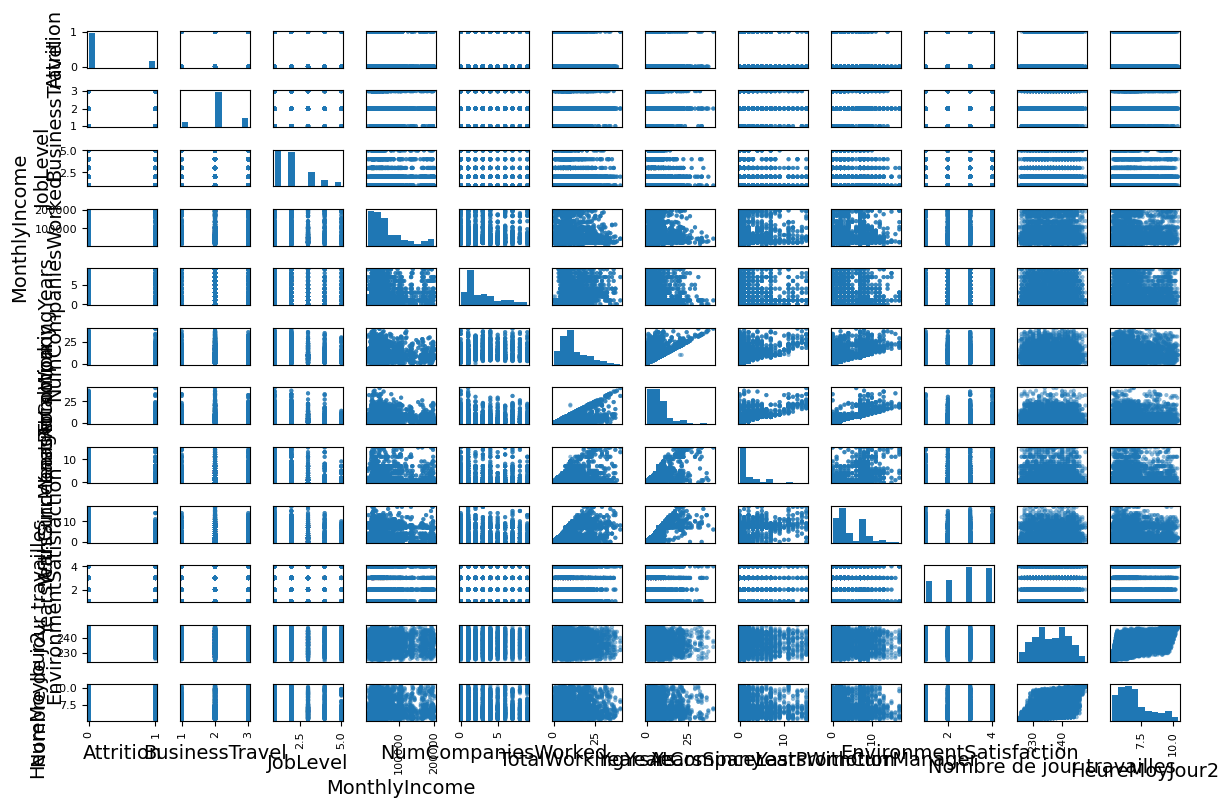

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["Attrition","BusinessTravel","Department","JobLevel","JobRole","MonthlyIncome","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager","EnvironmentSatisfaction","HeureMoyJour","Nombre de jour travailles",
              "HeureMoyJour2"]
scatter_matrix(donnees[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

La matrice est illisible, nous allons donc retirer les valeurs qui au premier regard ne semble pas intéréssantes.

Saving figure scatter_matrix_plot_2


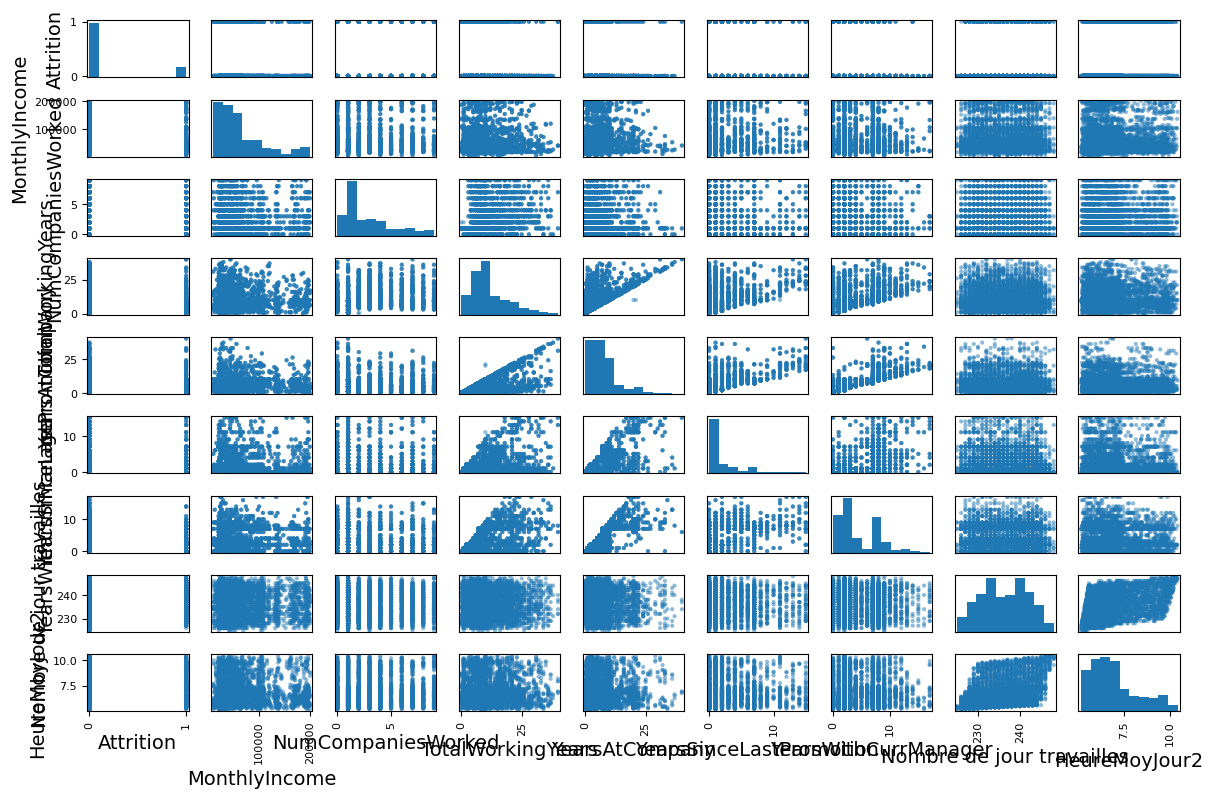

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Attrition","Department","JobRole","MonthlyIncome","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager","HeureMoyJour","Nombre de jour travailles",
              "HeureMoyJour2"]
scatter_matrix(donnees[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_2")

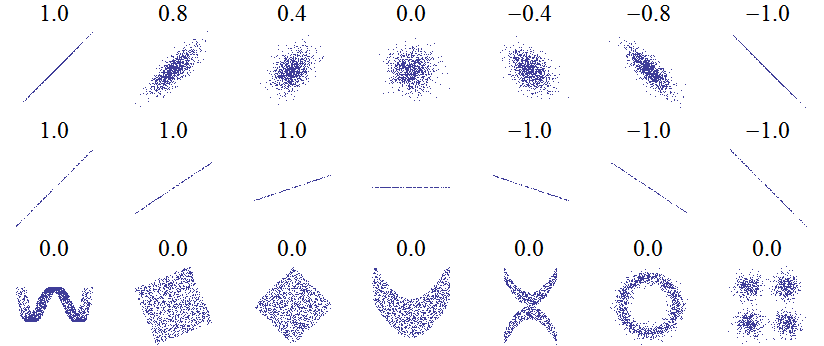

In [22]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png")

On peut désormais à l'aide de l'image ci-dessus déterminer si les variables ont des relations ou non.

### Création de la pipeline

Maintenant que nous savons quelles données nous souhaitons garder, 
il est temps de réaliser notre pipeline qui séléctionnera et transformera nos données 

In [23]:
# Import des modules nécessaires
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

donnees_labels = donnees["Attrition"].copy()
data = donnees.drop("Attrition", axis=1)

donnees_num = data.select_dtypes(include=[np.number]) 
num_attribs = list(donnees_num)
cat_attribs = ["Department", "JobRole"]

to_remove_num = ["Education","PercentsalaryHike","StockOptionLevel","TrainingTimesLastYear","WorkLifeBalanace","JobInvolvment","Over18","DistanceFromHome"]
num_attribs = [attr for attr in num_attribs if attr not in to_remove_num]


# Pipelines de préparation de données numériques et catégorielles
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('onehot_encoder', OneHotEncoder()),
])

# ColumnTransformer pour assembler les deux pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# Données préparées
data_prepared = full_pipeline.fit_transform(donnees)
print(donnees)


      EmployeeID  Age  Attrition  BusinessTravel              Department  \
0              1   51          0               2                   Sales   
1              2   31          1               3  Research & Development   
2              3   32          0               3  Research & Development   
3              4   38          0               1  Research & Development   
4              5   32          0               2  Research & Development   
...          ...  ...        ...             ...                     ...   
4405        4406   42          0               2  Research & Development   
4406        4407   29          0               2  Research & Development   
4407        4408   25          0               2  Research & Development   
4408        4409   42          0               2                   Sales   
4409        4410   40          0               2  Research & Development   

      DistanceFromHome  Education  Over18  JobLevel  \
0                    6          

### Séparation du jeu de donnée

Ici nous allons couper notre jeu de données en deux 
* 1) Le train set
* 2) Le test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_prepared, # vos données préparées
    donnees["Attrition"], # la variable cible pour la stratification
    test_size=0.2, # la taille du jeu de test
    random_state=42, # le générateur de nombres aléatoires pour la reproductibilité
    stratify=donnees["Attrition"] # spécifie la variable cible pour la stratification
)

On vérifie que nos données on été séparées en respectant la proportion d'attrition positive ou négative 

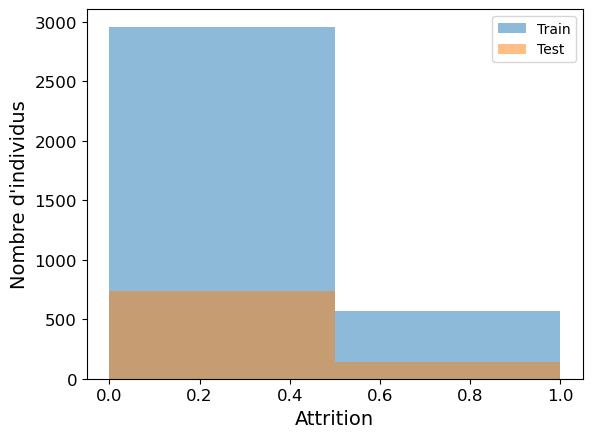

In [25]:
# histogramme de la variable cible pour le jeu de train
plt.hist(y_train, bins=2, alpha=0.5, label='Train')
# histogramme de la variable cible pour le jeu de test
plt.hist(y_test, bins=2, alpha=0.5, label='Test')

plt.xlabel('Attrition')
plt.ylabel('Nombre d\'individus')
plt.legend(loc='upper right')
plt.show()

<font color='red'>Pour déterminer quel est le meilleur modèle à utiliser pour notre jeu de données, nous allons en essayer plusieurs et à l'aide de différents indices de qualité, nous allons déterminer lequel nous allons garder pour réaliser nos prédictions.</font>

### Utilisation du modèle Classifieur binaire


In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train) 

# Prédiction sur les données de test
y_pred = sgd_clf.predict(X_test)

D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Indice de qualité du modèle Classifieur Binaire

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

recall = recall_score(y_test, y_pred)
print("Recall :", recall)

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

f1 = f1_score(y_test, y_pred)

print("F1-score :", f1)

True Negatives: 707
False Positives: 33
False Negatives: 110
True Positives: 32
Accuracy : 0.8378684807256236
Recall : 0.22535211267605634
Precision: 0.49230769230769234
F1-score : 0.30917874396135264


In [28]:
# Calculer les scores de décision pour l'ensemble de test
y_sgd = sgd_clf.decision_function(X_train)

#### Précision et recall

Saving figure precision_recall_vs_threshold_plot


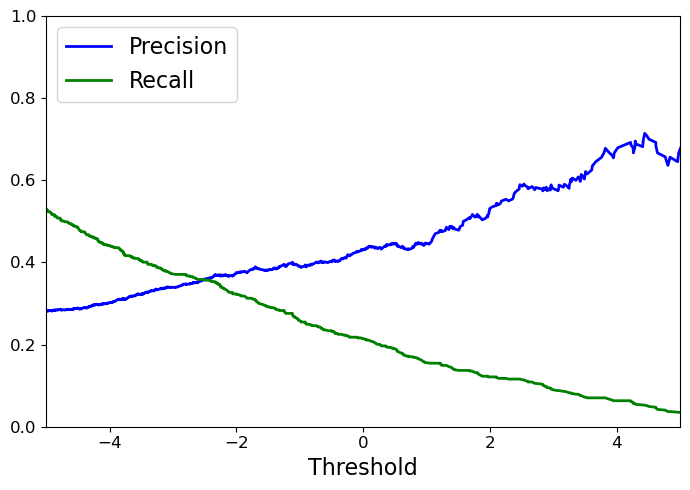

Saving figure precision_vs_recall_plot


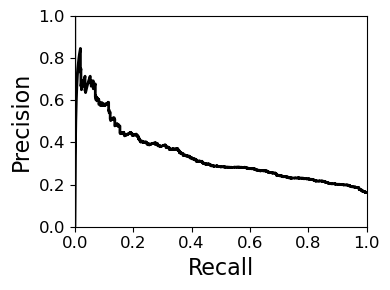

In [29]:
from sklearn.metrics import precision_recall_curve

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_sgd) 

def plot_precision_recall_vs_threshold(precisions_sgd, recalls_sgd, thresholds_sgd): 
    plt.plot(thresholds_sgd, precisions_sgd[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds_sgd, recalls_sgd[:-1], "g-", label="Recall", linewidth=2) 
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.xlim([-5, 5])

plt.figure(figsize=(7, 5))
plot_precision_recall_vs_threshold(precisions_sgd, recalls_sgd, thresholds_sgd) 
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions_sgd, recalls_sgd): 
    plt.plot(recalls_sgd, precisions_sgd, "k-", linewidth=2) 
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(4, 3))
plot_precision_vs_recall(precisions_sgd, recalls_sgd) 
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

La courbe ROC est un autre moyen d'évaluer un classifieur binaire. Elle confronte le taux de vrai positif (TPR ou recall) au taux de faux positif (FPR).

* Construisons cette courbe.

Saving figure roc_curve_plot


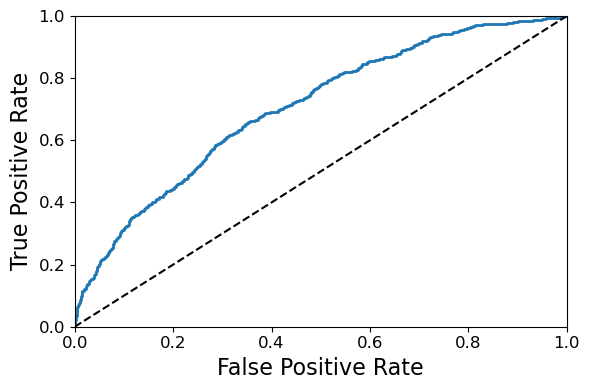

In [30]:
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_sgd) 

def plot_roc_curve(fpr_sgd, tpr_sgd, label=None): 
    plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(6, 4))
plot_roc_curve(fpr_sgd, tpr_sgd) 
save_fig("roc_curve_plot")
plt.show()

On utilise comme métrique de comparaison l'air sous la courbe ROC, que l'on souhaite la plus proche possible de  1.

In [31]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train, y_sgd) 

0.706784163889501

#### Cross validation 

La cross-validation nous permet d'estimer la précision d'une estimation.

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10) 
sgd_scores = np.sqrt(-scores) 

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(sgd_scores)

Scores: [0.52689695 0.51876952 0.47605556 0.54017099 0.48196952 0.51051271
 0.43890154 0.4453092  0.45226702 0.41286141]
Mean: 0.48037144206642396
Standard deviation: 0.040547842179101096


D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\logiciel_cesi\Anaconda\lib\site-packages\sklearn\line

### Utilisation du modèle Regression Logistique


In [33]:
# Import des modules nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialisation et entraînement du modèle de régression logistique
clf = LogisticRegression(random_state=28)
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rl = clf.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_rl)
print(f"Accuracy : {accuracy}")

Accuracy : 0.854875283446712


In [34]:
y_pred_train_rl = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train_rl)
print(f"Accuracy sur les données d'entraînement : {accuracy_train}")

Accuracy sur les données d'entraînement : 0.8540249433106576


### Indice de qualité du modèle Régression Logistique

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rl).ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

accuracy = accuracy_score(y_test, y_pred_rl)
print(f"Accuracy : {accuracy}")

recall = recall_score(y_test, y_pred_rl)
print("Recall :", recall)

precision = precision_score(y_test, y_pred_rl)
print(f"Precision: {precision}")

f1 = f1_score(y_test, y_pred_rl)

print("F1-score :", f1)

True Negatives: 730
False Positives: 10
False Negatives: 118
True Positives: 24
Accuracy : 0.854875283446712
Recall : 0.16901408450704225
Precision: 0.7058823529411765
F1-score : 0.27272727272727276


In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
y_scores = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function")

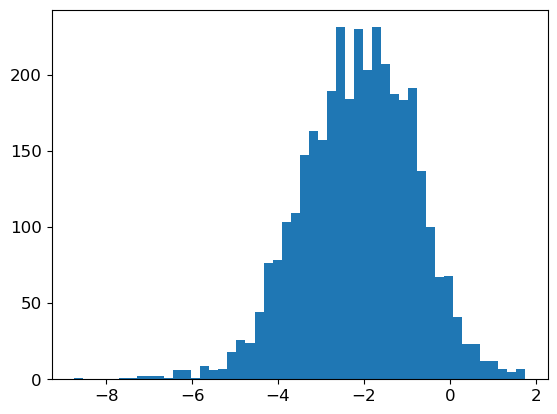

In [37]:
import matplotlib.pyplot as plt

plt.hist(y_scores, bins=50)
plt.show()

#### Précision et recall

Saving figure precision_recall_vs_threshold_plot


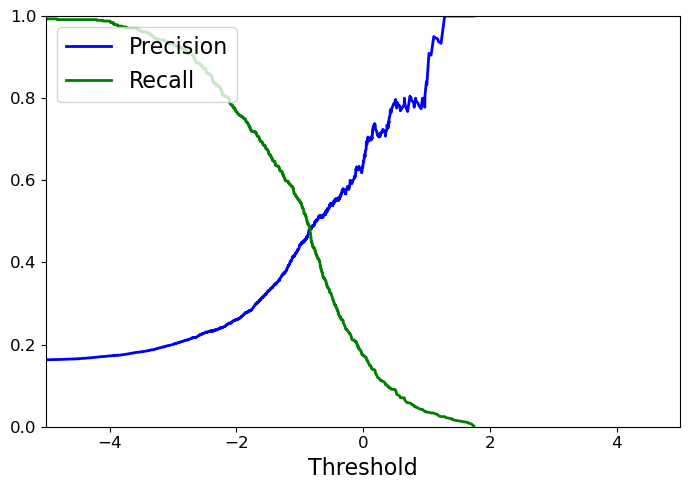

Saving figure precision_vs_recall_plot


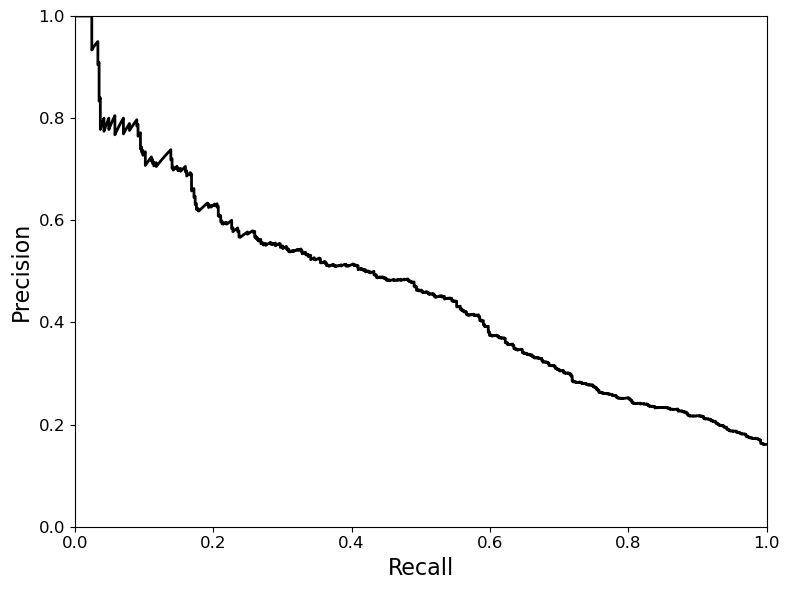

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores) 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) 
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.xlim([-5, 5])

plt.figure(figsize=(7, 5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): 
    plt.plot(recalls, precisions, "k-", linewidth=2) 
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) 
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

La courbe ROC est un autre moyen d'évaluer un classifieur binaire. Elle confronte le taux de vrai positif (TPR ou recall) au taux de faux positif (FPR).

* Construisons cette courbe.

Saving figure roc_curve_plot


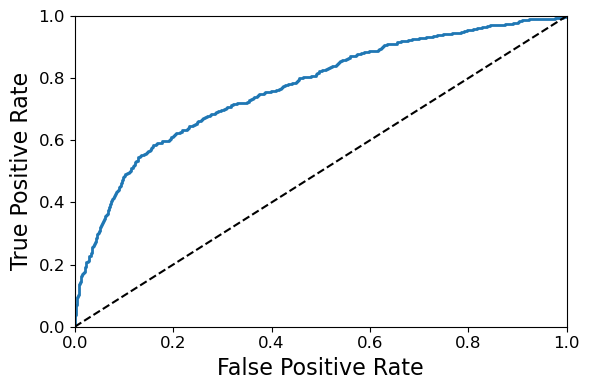

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(6, 4))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

On utilise comme métrique de comparaison l'air sous la courbe ROC, que l'on souhaite la plus proche possible de 1.

In [40]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train, y_scores) 

0.7695868135758115

#### Cross validation

La cross-validation nous permet d'estimer la précision d'une estimation.

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
clf_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(clf_scores)

Scores: [0.38009988 0.38748115 0.39472442 0.4053467  0.38380826 0.39111955
 0.36488968 0.40183714 0.36927447 0.3614994 ]
Mean: 0.38400806608841404
Standard deviation: 0.014336088661635445


### Utilisation du modèle RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import StandardScaler

forest_clf = RandomForestClassifier(random_state=42, n_estimators=50)# ,max-depth=30
forest_clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rf = forest_clf.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9693877551020408


In [43]:
y_pred_train_rf = forest_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train_rf)
print(f"Accuracy sur les données d'entraînement : {accuracy_train}")

Accuracy sur les données d'entraînement : 1.0


### Indice de qualité du modèle RandomForestClassifier

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy : {accuracy}")

recall = recall_score(y_test, y_pred_rf)
print("Recall :", recall)

precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision}")

f1 = f1_score(y_test, y_pred_rf)

print("F1-score :", f1)

True Negatives: 740
False Positives: 0
False Negatives: 27
True Positives: 115
Accuracy : 0.9693877551020408
Recall : 0.8098591549295775
Precision: 1.0
F1-score : 0.8949416342412452


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method ="predict_proba")

#### Précision et recall

Saving figure precision_recall_vs_threshold_plot


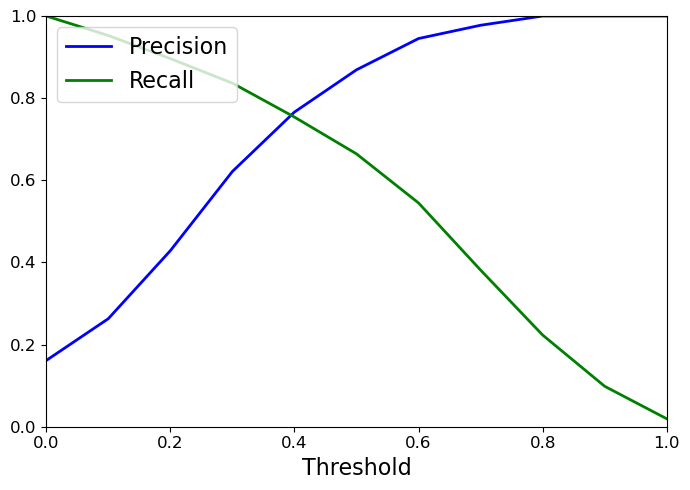

Saving figure precision_vs_recall_plot


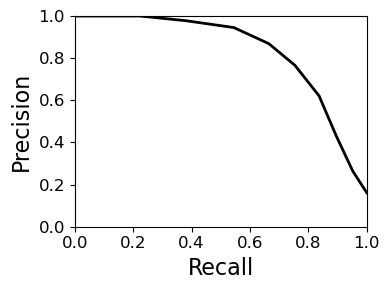

In [46]:
from sklearn.metrics import precision_recall_curve

y_scores_forest = y_probas_forest[:, 1] 
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train, y_scores_forest) 

def plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest): 
    plt.plot(thresholds_forest, precisions_forest[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds_forest, recalls_forest[:-1], "g-", label="Recall", linewidth=2) 
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.xlim([0, 1])

plt.figure(figsize=(7, 5))
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest) 
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions_forest, recalls_forest): 
    plt.plot(recalls_forest, precisions_forest, "k-", linewidth=2) 
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(4, 3))
plot_precision_vs_recall(precisions_forest, recalls_forest) 
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

La courbe ROC est un autre moyen d'évaluer un classifieur binaire. Elle confronte le taux de vrai positif (TPR ou recall) au taux de faux positif (FPR).

* Construisons cette courbe.

Saving figure roc_curve_plot


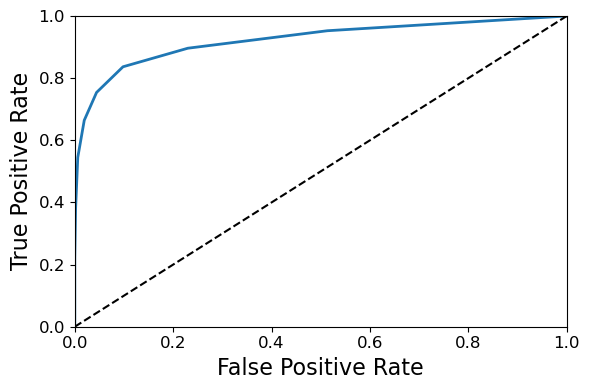

In [47]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest) 

def plot_roc_curve(fpr_forest, tpr_forest, label=None): 
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(6, 4))
plot_roc_curve(fpr_forest, tpr_forest) 
save_fig("roc_curve_plot")
plt.show()

On utilise comme métrique de comparaison l'air sous la courbe ROC, que l'on souhaite la plus proche possible de 1.

In [48]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train, y_scores_forest) 

0.9223963589085991

#### Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf,X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_clf_scores = np.sqrt(-forest_scores)

def display_scores(forest_scores):
    print("Scores:", forest_scores)
    print("Mean:", forest_scores.mean())
    print("Standard deviation:", forest_scores.std())

display_scores(forest_clf_scores)

Scores: [0.25525636 0.22581298 0.25525636 0.2866234  0.27139342 0.24964564
 0.23200078 0.26074637 0.22613351 0.23836565]
Mean: 0.25012344643849255
Standard deviation: 0.018930451118142913


### Séléction du meilleur modèle

#### Tableau de comparaison d'indice de qualité

Afin de nous aider à choisir un modèle, nous allons utiliser les différents indices de qualités réalisés précédement et les comparer.
Le modèle ayant les meilleurs indices sera probablement celui que nous séléctionnerons pour la suite du projet.

|Modèle|SGDC|Logistic regression|Random forest classifier|
|---|---|---|---|
|True Negatives|707|730|<font color='green'>740</font>|
|False Positives|33|10|<font color='green'>0</font>|
|False Negatives|110|118|<font color='green'>27</font>|
|True Positives|32|24|<font color='green'>115</font>|
|Accuracy|0.8378|0.8548|<font color='green'>0.9693</font>|
|Recall|0.2253|0.1690|<font color='green'>0.8098</font>|
|Precision|0.4923|0.7058|<font color='green'>1.0</font>|
|F1-score|0.3091|0.2727|<font color='green'>0.8949</font>|

#### Courbe ROC de comparaison

Afin de nous aider à choisir choisir un modèle, nous allons utiliser les différentes courbes ROC réalisées précédement et les comparer.
Le modèle ayant la meilleure courbe sera probablement celui que nous séléctionnerons pour la suite du projet.

In [50]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train,y_sgd)

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

Saving figure roc_curve_comparison_plot


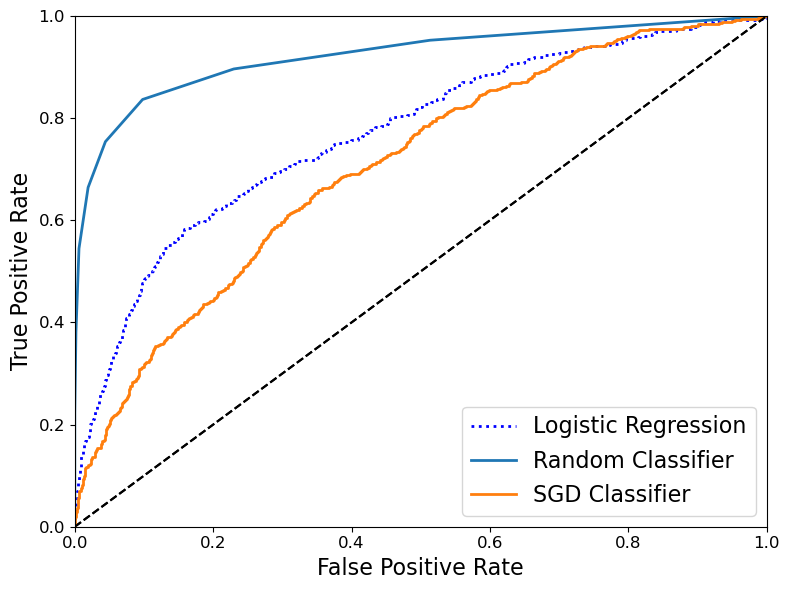

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Logistic Regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Classifier") 
plot_roc_curve(fpr_sgd, tpr_sgd, "SGD Classifier") 
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

#### A l'aide du tableau de comparaison d'indice que qualité et du graphique de comparaison de courbe ROC, nous choisissons donc de garder le modèle <font color='red'>Random Forest Classifier</font>.

### Maintenant que nous avons choisis notre programme, nous allons tenter de l'améliorer en faisant du tuning

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # essaye 12 (3×4) combinaisons des hyperparametres
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # puis essaye 6 (2×3) combinaisons avec bootstrap à False (True étant la valeur par défaut)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = RandomForestClassifier(random_state=42, n_estimators=50)

# 5 sous-jeux de cross-val, ça fait en tout (12+6)*5=90 tours d'entraînement 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
# Ici on affiche le meilleurs tuning 
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [54]:
# Ici on obtient directement le meilleur modèle :                
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=10,
                       random_state=42)

Notre modèle sera donc le plus optimisé pour nos données avec les paramètres suivant :
* bootstrap=False
* max_features=4
* n_estimators=10